In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
ctl = pd.read_csv('custom_unet_Loss_train.csv')[['Step', 'Value']].assign(set='train', row='loss', model='custom')
cvl = pd.read_csv('custom_unet_Loss_val.csv')[['Step', 'Value']].assign(set='val', row='loss', model='custom')
cti = pd.read_csv('custom_unet_IoU_train.csv')[['Step', 'Value']].assign(set='train', row='IoU', model='custom')
cvi = pd.read_csv('custom_unet_IoU_val.csv')[['Step', 'Value']].assign(set='val', row='IoU', model='custom')

ptl = pd.read_csv('pretrained_unet_Loss_train.csv')[['Step', 'Value']].assign(set='train', row='loss', model='pretrained')
pvl = pd.read_csv('pretrained_unet_Loss_val.csv')[['Step', 'Value']].assign(set='val', row='loss', model='pretrained')
pti = pd.read_csv('pretrained_unet_IoU_train.csv')[['Step', 'Value']].assign(set='train', row='IoU', model='pretrained')
pvi = pd.read_csv('pretrained_unet_IoU_val.csv')[['Step', 'Value']].assign(set='val', row='IoU', model='pretrained')

data = pd.concat((ctl, cvl, cti, cvi, ptl, pvl, pti, pvi))

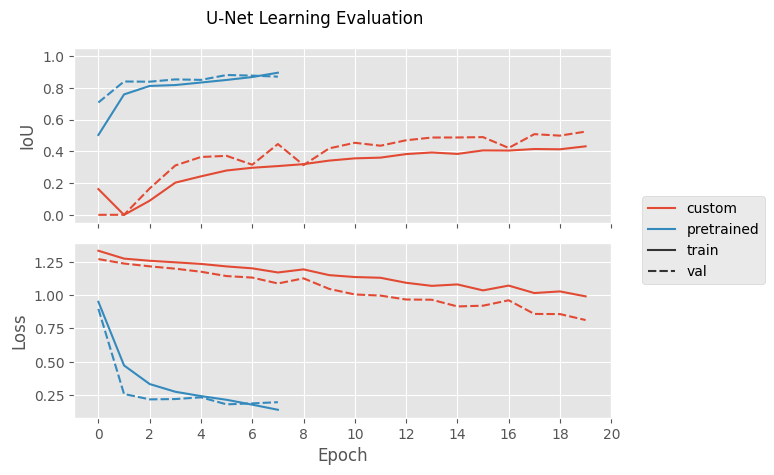

In [6]:
fig, ax = plt.subplots(nrows=2, sharex=True)
sns.lineplot(data=data.query('row == "IoU"'), x='Step', y='Value', hue='model', style='set', ax=ax[0])
sns.lineplot(data=data.query('row == "loss"'), x='Step', y='Value', hue='model', style='set', ax=ax[1], legend=False)
ax[0].set_ylim(-0.05, 1.05)
ax[0].set_ylabel('IoU')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_xticks(list(range(0, 21, 2)), list(range(0, 21, 2)))
ax[0].legend('', frameon=False)

# Bit of a hacky way to get rid of the legend titles
h, l = ax[0].get_legend_handles_labels()
h = [h[i] for i in [1,2,4,5]]
l = [l[i] for i in [1,2,4,5]]
###

fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), handles=h, labels=l)
plt.suptitle('U-Net Learning Evaluation')
plt.tight_layout()
plt.savefig('training.svg', bbox_inches='tight')
plt.show()